In [333]:
# import libraries

import pandas as pd
import numpy as np

# read in the three data sets

contents_df = pd.read_csv("/Users/sborovoy/Documents/analyst_projs/accenture_analytics/Content.csv")
reactions_df = pd.read_csv("/Users/sborovoy/Documents/analyst_projs/accenture_analytics/Reactions.csv")
reaction_type_df = pd.read_csv("/Users/sborovoy/Documents/analyst_projs/accenture_analytics/ReactionTypes.csv")

# Data Cleaning

### Contents Data Frame

In [334]:
# Let's clean the contents data frame first

In [335]:
# Let's preview the data

contents_df.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [336]:
# remove the unimportant columns for analysis

dropped_columns = ['Unnamed: 0', "User ID", "URL"]
contents_df.drop(columns = dropped_columns, inplace=True)

In [337]:
# view values for Category column

contents_df.Category.value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

In [338]:
# duplicate categories exist due to quotations or an uppercase inital letter. Consolidate duplicates by:

# strip the quotation marks
contents_df['Category'] = contents_df['Category'].str.strip('""')

# make all strings lower case
contents_df['Category'] = contents_df['Category'].str.lower()

In [339]:
# change Content column name and Type for uniformity and uniqueness across data sets

contents_df.rename(columns={'Category': 'Category Type', 'Type': 'Content Type'}, inplace=True)

In [340]:
contents_df['Category Type'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category Type, dtype: int64

In [341]:
# Let's see the null values in the data frame

contents_df.isnull().sum()

Content ID       0
Content Type     0
Category Type    0
dtype: int64

In [342]:
# remove rows with null values

contents_df.dropna(inplace=True)

In [343]:
# check for uniform data types in columns

for col in contents_df:
    print(f"The data type(s) for values in the {col} column are: {contents_df[col].apply(type).unique()}")

The data type(s) for values in the Content ID column are: [<class 'str'>]
The data type(s) for values in the Content Type column are: [<class 'str'>]
The data type(s) for values in the Category Type column are: [<class 'str'>]


### Reaction Data Frame

In [344]:
# preview the data

reactions_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [345]:
# remove the unimportant columns for analysis

dropped_columns = ['Unnamed: 0', "User ID"]
reactions_df.drop(columns=dropped_columns, inplace = True)

In [346]:
# change Type column name to differentiate from Content Type column

reactions_df.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [347]:
# Let's see the null values in the data frame

reactions_df.isnull().sum()

Content ID         0
Reaction Type    980
Datetime           0
dtype: int64

In [348]:
# remove rows with null values

reactions_df.dropna(inplace=True)

In [349]:
## check for uniform data types in columns

for col in reactions_df:
    print(f"The data types for values in the {col} column is: {reactions_df[col].apply(type).unique()}")

The data types for values in the Content ID column is: [<class 'str'>]
The data types for values in the Reaction Type column is: [<class 'str'>]
The data types for values in the Datetime column is: [<class 'str'>]


### Reaction Type Data Frame

In [350]:
# Let's preview the data

reaction_type_df

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [351]:
# remove the unimportant columns

dropped_columns = ['Unnamed: 0']
reaction_type_df.drop(columns = dropped_columns, inplace=True)

In [352]:
# change Type column name to differentiate from Content Type column

reaction_type_df.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [353]:
# Let's see the null values in the data frame

reaction_type_df.isnull().sum()

# the df has no null values!

Reaction Type    0
Sentiment        0
Score            0
dtype: int64

In [354]:
# check for uniform data types in columns

for col in reaction_type_df:
    print(f"The data types for values in the {col} column is: {reaction_type_df[col].apply(type).unique()}")

The data types for values in the Reaction Type column is: [<class 'str'>]
The data types for values in the Sentiment column is: [<class 'str'>]
The data types for values in the Score column is: [<class 'int'>]


# Analysis: Find the top 5 most popular Categories

### Create a final data set by merging the three tables together

In [355]:
# merge contents and reactions dfs
joined_df = contents_df.merge(reactions_df, on='Content ID')

#merge joined_df and reaction types df
final_df = joined_df.merge(reaction_type_df, on='Reaction Type')

In [356]:
# view our new merged data frame

final_df

,Content ID,Content Type,Category Type,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture,adore,2020-06-25 15:12:29,positive,72


### Figure out the Top 5 performing categories

In [357]:
# find score totals by Category Type

scores = final_df.groupby('Category Type')['Score'].sum().reset_index()

# sort scores
scores_sorted = scores.sort_values(by='Score', ascending = False).reset_index()
scores_sorted.drop(columns='index', inplace = True)

In [358]:
# view the sorted scores data frame
scores_sorted

,Category Type,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676
5,culture,66579
6,travel,64880
7,cooking,64756
8,soccer,57783
9,education,57436


In [359]:
# top 5 performing categories

scores_sorted[:5]

,Category Type,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [360]:
# export the data frames

final_df.to_excel('cleaned_df.xlsx', index=False)

scores_sorted.to_excel('category_analysis.xlsx', index=False)

### Follow up: How many reactions are there to the most popular category?

In [414]:
# use value counts function to rank the most reacted to categories

final_df['Category Type'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category Type, dtype: int64

# Visualization

### What was the month with the most posts?

In [ ]:
# import visualization libraries
import matplotlib.pyplot as plt

In [370]:
# check if datetime field is a datetime data type
final_df.dtypes

Content ID       object
Content Type     object
Category Type    object
Reaction Type    object
Datetime         object
Sentiment        object
Score             int64
dtype: object

In [372]:
# convert to datetime data type

final_df['Datetime'] = pd.to_datetime(final_df['Datetime'])

In [375]:
# extract months
final_df['Month'] = final_df['Datetime'].dt.month

In [384]:
# calculate frequency of each month
month_counts = final_df['Month'].value_counts()

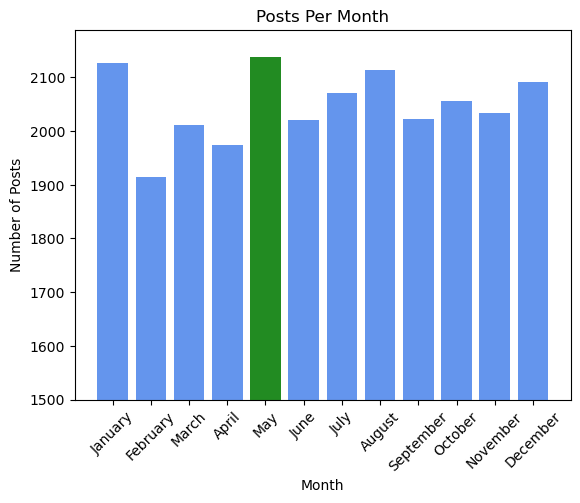

In [410]:
# create a bar chart

# set color of May to red to highlight it as the leading month
top_month = ['cornflowerblue' if idx != 5 else 'forestgreen' for idx in month_counts.index]

plt.bar(month_counts.index, month_counts.values, color = top_month)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Posts Per Month')

# set x-axis
plt.xticks(range(1, 13), [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)

# set y-axis range to show relevant values for clearer marginal differences
plt.ylim(1500, max(month_counts.values + 50))

plt.show()